In [4]:
import json
from os import walk
from os.path import isfile, join
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [6]:
filepath = "/Users/matt/repos/thermal_state_prep/numerics/data/two_level/fixed_epsilon.json"
with open(filepath) as f:
    j = json.load(f)
    inputs = j["inputs"]
    outputs = j["outputs"]
    num_samples = j["num_samples"]
    dim_sys = j["dim_sys"]
    label = j["label"]
    if len(inputs) != len(outputs):
        raise Exception("inputs and outputs are not the same length.")
    print("len of inputs: ", len(inputs))
alphas, beta_envs, epsilons, times = set(), set(), set(), set()
for (alpha, beta_env, beta_sys, time) in inputs:
    alphas.add(alpha)
    beta_envs.add(beta_env)
    epsilons.add(beta_sys)
    times.add(time)
alphas = list(alphas)
alphas.sort()
beta_envs = list(beta_envs)
beta_envs.sort()
epsilons = list(epsilons)
epsilons.sort()
times = list(times)
times.sort()

print("alphas")
print(alphas)
print("beta_envs")
print(beta_envs)
print("epsilons")
print(epsilons)
print("times")
print(times)
    

len of inputs:  40
alphas
[0.001]
beta_envs
[0.01, 0.011727470767766642, 0.013753357060882113, 0.0161292092890152, 0.018915483044411596, 0.022183077446152256, 0.02601513922888541, 0.030509178482613288, 0.03577954988034226, 0.041960362530556204, 0.04920889249819889, 0.057709584828679876, 0.06767874690982925, 0.07937005259841, 0.09308099716839537, 0.10916046733269268, 0.1280176189639899, 0.15013228841592802, 0.17606720236957063, 0.20648229689515943, 0.24215151008992952, 0.28398247559501977, 0.3330396181098598, 0.3905712385891547, 0.4580412783284723, 0.5371665702027626, 0.6299605249474366, 0.7387843641167992, 0.866407203386283, 1.0160765150695081, 1.1916007628291865, 1.397446311292771, 1.6388510765209305, 1.9219578092622114, 2.253970402500339, 2.643337200673395, 3.0999659750247335, 3.63547603531738, 4.263493893110076, 4.999999999999999]
epsilons
[0.05]
times
[100.0]


beta_env, beta_sys, time 0.001 0.05 100.0
beta_env, num_interactions =  0.01 ,  1
beta_env, num_interactions =  0.011727470767766642 ,  1
beta_env, num_interactions =  0.013753357060882113 ,  1
beta_env, num_interactions =  0.0161292092890152 ,  1
beta_env, num_interactions =  0.018915483044411596 ,  1
beta_env, num_interactions =  0.022183077446152256 ,  1
beta_env, num_interactions =  0.02601513922888541 ,  1
beta_env, num_interactions =  0.030509178482613288 ,  1
beta_env, num_interactions =  0.03577954988034226 ,  1
beta_env, num_interactions =  0.041960362530556204 ,  1
beta_env, num_interactions =  0.04920889249819889 ,  1
beta_env, num_interactions =  0.057709584828679876 ,  1
beta_env, num_interactions =  0.06767874690982925 ,  1
beta_env, num_interactions =  0.07937005259841 ,  1
beta_env, num_interactions =  0.09308099716839537 ,  1
beta_env, num_interactions =  0.10916046733269268 ,  87
beta_env, num_interactions =  0.1280176189639899 ,  254
beta_env, num_interactions =  0.1

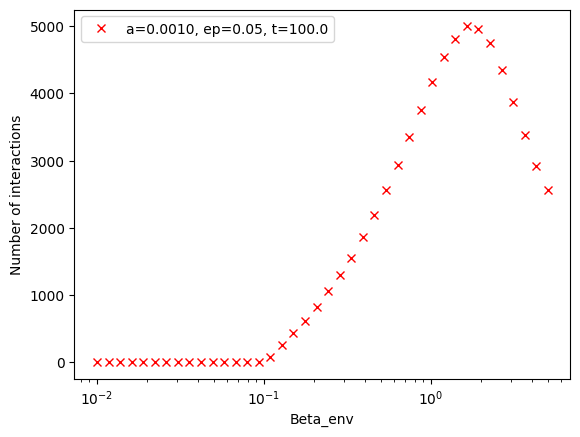

In [7]:

fixed_params = [(alphas[0], epsilons[0], times[ix]) for ix in range(len(times))]
fig = plt.figure()
colors = ['r', 'b', 'g', 'black', 'orange']
color_count = 0
for ( alpha_0, epsilon_0, time_0) in fixed_params:
    print("beta_env, beta_sys, time", alpha_0, epsilon_0, time_0)
    x = []
    y = []
    yerr = []
    for ix in range(len(inputs)):
        (alpha, beta_env, epsilon, time) = inputs[ix]
        (num_interactions, mean_dist, std_dist, dist_of_mean) = outputs[ix]
        if alpha == alpha_0 and epsilon == epsilon_0 and time == time_0:
            x.append(beta_env)
            y.append(num_interactions)

            print("beta_env, num_interactions = ", beta_env, ", ", num_interactions)
    plt.plot(x, y, marker='x', linestyle='none', label="a={:.4f}, ep={:.2f}, t={:.1f}".format(alpha_0, epsilon_0, time_0), color=colors[color_count])
    color_count += 1
plt.xscale('log')
# plt.yscale('log')
plt.xlabel("Beta_env")
plt.ylabel("Number of interactions")
plt.legend()
plt.show()